# Import

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sbn

In [2]:
df = pd.read_csv("BA_DataSet.csv")

# Veri Düzenleme

In [3]:
df

,Unnamed: 0,reviews,Rota,Seat_Type
0,0,✅ Trip Verified | Despite boarding being the u...,London to Santiago,Business Class
1,1,"Not Verified | Flight cancelled, no crew! 9th...",London Heathrow to Faro,Business Class
2,2,"Not Verified | The worst service ever, my bag...",Kuwait to Lisbon via London,Economy Class
3,3,✅ Trip Verified | 4/4 flights we booked this ...,London to Munich,Economy Class
4,4,✅ Trip Verified | British Airways has a total...,Frankfurt to London City,Economy Class
...,...,...,...,...
995,995,✅ Trip Verified | London to Boston. I was sea...,London to Boston,Economy Class
996,996,✅ Trip Verified | Stockholm to London. Standar...,Stockholm to London,Business Class
997,997,✅ Trip Verified | Amsterdam to London arrived...,Amsterdam to London,Economy Class
998,998,✅ Trip Verified | Buenos Aires to London. We ...,Buenos Aires to London,Economy Class


In [4]:
df.columns = ["Index", "Onay_Durumu_ve_Yorum", "Rota", "Seat_Type"]

In [5]:
df

,Index,Onay_Durumu_ve_Yorum,Rota,Seat_Type
0,0,✅ Trip Verified | Despite boarding being the u...,London to Santiago,Business Class
1,1,"Not Verified | Flight cancelled, no crew! 9th...",London Heathrow to Faro,Business Class
2,2,"Not Verified | The worst service ever, my bag...",Kuwait to Lisbon via London,Economy Class
3,3,✅ Trip Verified | 4/4 flights we booked this ...,London to Munich,Economy Class
4,4,✅ Trip Verified | British Airways has a total...,Frankfurt to London City,Economy Class
...,...,...,...,...
995,995,✅ Trip Verified | London to Boston. I was sea...,London to Boston,Economy Class
996,996,✅ Trip Verified | Stockholm to London. Standar...,Stockholm to London,Business Class
997,997,✅ Trip Verified | Amsterdam to London arrived...,Amsterdam to London,Economy Class
998,998,✅ Trip Verified | Buenos Aires to London. We ...,Buenos Aires to London,Economy Class


In [6]:
df[['Onay_Durumu', 'Yorum']] = df['Onay_Durumu_ve_Yorum'].str.split('|', expand=True)

In [7]:
df = df.drop(columns=['Onay_Durumu_ve_Yorum'])

In [8]:
df = df.drop(columns=['Index'])

In [9]:
df.head()

,Rota,Seat_Type,Onay_Durumu,Yorum
0,London to Santiago,Business Class,✅ Trip Verified,Despite boarding being the usual free for all...
1,London Heathrow to Faro,Business Class,Not Verified,"Flight cancelled, no crew! 9th September 202..."
2,Kuwait to Lisbon via London,Economy Class,Not Verified,"The worst service ever, my baggage did not a..."
3,London to Munich,Economy Class,✅ Trip Verified,4/4 flights we booked this holiday were dela...
4,Frankfurt to London City,Economy Class,✅ Trip Verified,British Airways has a total lack of respect ...


In [10]:
df["Onay_Durumu"] = df["Onay_Durumu"].str.replace("✅", "").str.strip()

In [11]:
df

,Rota,Seat_Type,Onay_Durumu,Yorum
0,London to Santiago,Business Class,Trip Verified,Despite boarding being the usual free for all...
1,London Heathrow to Faro,Business Class,Not Verified,"Flight cancelled, no crew! 9th September 202..."
2,Kuwait to Lisbon via London,Economy Class,Not Verified,"The worst service ever, my baggage did not a..."
3,London to Munich,Economy Class,Trip Verified,4/4 flights we booked this holiday were dela...
4,Frankfurt to London City,Economy Class,Trip Verified,British Airways has a total lack of respect ...
...,...,...,...,...
995,London to Boston,Economy Class,Trip Verified,London to Boston. I was seated next to a cus...
996,Stockholm to London,Business Class,Trip Verified,Stockholm to London. Standard configuration o...
997,Amsterdam to London,Economy Class,Trip Verified,Amsterdam to London arrived 33 minutes late ...
998,Buenos Aires to London,Economy Class,Trip Verified,Buenos Aires to London. We flew overnight Fr...


# Veri Analizi 1 - Yorum Analizi - İyi/Kötü/Nötr Ayrımı

In [12]:
from textblob import TextBlob

In [13]:
def sentiment_analysis(text):
    analysis = TextBlob(text)
    if analysis.sentiment.polarity > 0.0:
        return "iyi"
    elif analysis.sentiment.polarity < 0.0:
        return "kötü"
    else:
        return "nötr"

In [14]:
df["Yorum_Tipi"] = df["Yorum"].apply(sentiment_analysis)

In [15]:
df

,Rota,Seat_Type,Onay_Durumu,Yorum,Yorum_Tipi
0,London to Santiago,Business Class,Trip Verified,Despite boarding being the usual free for all...,iyi
1,London Heathrow to Faro,Business Class,Not Verified,"Flight cancelled, no crew! 9th September 202...",kötü
2,Kuwait to Lisbon via London,Economy Class,Not Verified,"The worst service ever, my baggage did not a...",kötü
3,London to Munich,Economy Class,Trip Verified,4/4 flights we booked this holiday were dela...,kötü
4,Frankfurt to London City,Economy Class,Trip Verified,British Airways has a total lack of respect ...,kötü
...,...,...,...,...,...
995,London to Boston,Economy Class,Trip Verified,London to Boston. I was seated next to a cus...,iyi
996,Stockholm to London,Business Class,Trip Verified,Stockholm to London. Standard configuration o...,iyi
997,Amsterdam to London,Economy Class,Trip Verified,Amsterdam to London arrived 33 minutes late ...,iyi
998,Buenos Aires to London,Economy Class,Trip Verified,Buenos Aires to London. We flew overnight Fr...,kötü


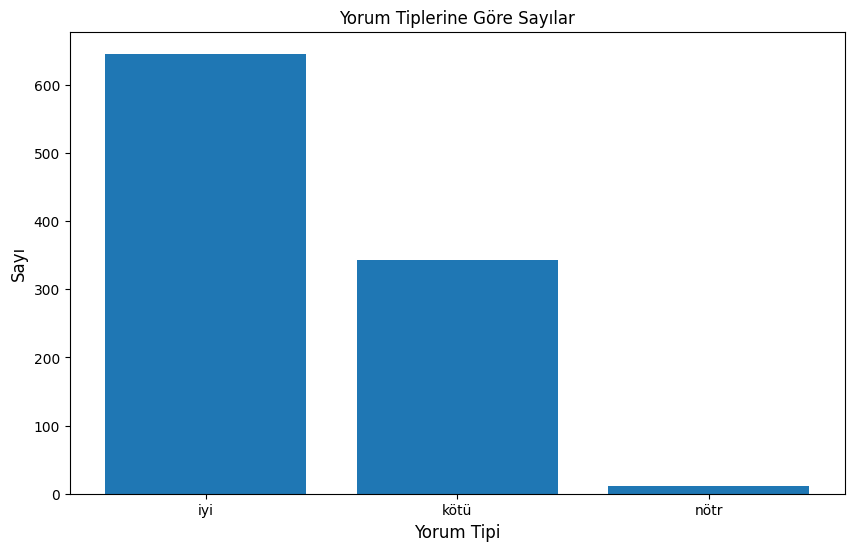

In [16]:
yorum_sayilari = df['Yorum_Tipi'].value_counts()

# Bar grafiğini oluşturun
plt.figure(figsize=(10,6))
plt.bar(yorum_sayilari.index, yorum_sayilari.values)

plt.title('Yorum Tiplerine Göre Sayılar')
plt.ylabel('Sayı', fontsize=12)
plt.xlabel('Yorum Tipi', fontsize=12)

plt.show()

# Veri Analizi 2 - Rota Analizi - Nereden/Nereye

In [17]:
# 'Rota' sütununda ' to ' içermeyen satırları bulun
invalid_rows = df['Rota'].str.contains(' to ') == False

print(df[invalid_rows])

                  Rota      Seat_Type    Onay_Durumu  \
166  London Singapore   Economy Class  Trip Verified   

                                                 Yorum Yorum_Tipi  
166    Although it was a bit uncomfortable flight i...        iyi  


In [18]:
df.isna().sum().sum()

3

In [19]:
df['Rota'] = df['Rota'].str.replace('London Singapore', 'London to Singapore')

In [20]:
df['Rota'].fillna('Unknown to Unknown', inplace=True)

In [21]:
df[df['Rota'].str.count(' to ') > 1]

,Rota,Seat_Type,Onay_Durumu,Yorum,Yorum_Tipi
638,doha to londonDoha to London,Economy Class,Trip Verified,"Doha to London. Surprisingly good flight, on...",iyi
938,Bucharest to London Heathrow to Los Angeles,Economy Class,Trip Verified,I understand completely why there is air rage...,iyi


In [22]:
df['Rota'] = df['Rota'].str.replace('doha to londonDoha to London', 'Doha to London')
df['Rota'] = df['Rota'].str.replace('Bucharest to London Heathrow to Los Angeles', 'Bucharest to Los Angeles')

In [23]:
df[['Nereden', 'Nereye']] = df['Rota'].str.split(' to ', expand=True)

In [24]:
df = df.drop(columns=['Rota'])

In [25]:
df

,Seat_Type,Onay_Durumu,Yorum,Yorum_Tipi,Nereden,Nereye
0,Business Class,Trip Verified,Despite boarding being the usual free for all...,iyi,London,Santiago
1,Business Class,Not Verified,"Flight cancelled, no crew! 9th September 202...",kötü,London Heathrow,Faro
2,Economy Class,Not Verified,"The worst service ever, my baggage did not a...",kötü,Kuwait,Lisbon via London
3,Economy Class,Trip Verified,4/4 flights we booked this holiday were dela...,kötü,London,Munich
4,Economy Class,Trip Verified,British Airways has a total lack of respect ...,kötü,Frankfurt,London City
...,...,...,...,...,...,...
995,Economy Class,Trip Verified,London to Boston. I was seated next to a cus...,iyi,London,Boston
996,Business Class,Trip Verified,Stockholm to London. Standard configuration o...,iyi,Stockholm,London
997,Economy Class,Trip Verified,Amsterdam to London arrived 33 minutes late ...,iyi,Amsterdam,London
998,Economy Class,Trip Verified,Buenos Aires to London. We flew overnight Fr...,kötü,Buenos Aires,London


### 'Via' Temizleme - Aktarma Ayrımı

In [26]:
invalid_rows_nereden = df['Nereden'].str.contains('via')

print(df[invalid_rows_nereden])

          Seat_Type    Onay_Durumu  \
81  Premium Economy  Trip Verified   

                                                Yorum Yorum_Tipi  \
81   My husband and I booked seats within our prem...       kötü   

                 Nereden            Nereye  
81  Sydney via Singapore  London Heathrow   


In [27]:
invalid_rows_nereye = df['Nereye'].str.contains('via')

print(df[invalid_rows_nereye])

           Seat_Type    Onay_Durumu  \
2      Economy Class   Not Verified   
10     Economy Class  Trip Verified   
11   Premium Economy  Trip Verified   
19     Economy Class  Trip Verified   
28     Economy Class  Trip Verified   
..               ...            ...   
982    Economy Class  Trip Verified   
985   Business Class  Trip Verified   
987    Economy Class  Trip Verified   
992    Economy Class  Trip Verified   
993  Premium Economy  Trip Verified   

                                                 Yorum Yorum_Tipi  \
2      The worst service ever, my baggage did not a...       kötü   
10     My recent experience with British Airways wa...        iyi   
11     This is to express our displeasure and conce...        iyi   
19     8 months have passed and still wasting my ti...       kötü   
28     They lost my baggage in a very simple situat...        iyi   
..                                                 ...        ...   
982    We have been loyal customers with British

In [28]:
# 'Nereden' ve 'Nereye' sütunlarını 'via' kelimesine göre ayırın
df.loc[invalid_rows_nereden, 'Aktarma'] = df.loc[invalid_rows_nereden, 'Nereden'].str.split('via').str[1]
df.loc[invalid_rows_nereden, 'Nereden'] = df.loc[invalid_rows_nereden, 'Nereden'].str.split('via').str[0]

df.loc[invalid_rows_nereye, 'Aktarma'] = df.loc[invalid_rows_nereye, 'Nereye'].str.split('via').str[1]
df.loc[invalid_rows_nereye, 'Nereye'] = df.loc[invalid_rows_nereye, 'Nereye'].str.split('via').str[0]

In [29]:
df.isna().sum().sum()

817

### Temizlemeye Devam

In [30]:
print("En çok geçen 'Nereden' değerleri:")
print(df['Nereden'].value_counts().head(10))

print("\nEn çok geçen 'Nereye' değerleri:")
print(df['Nereye'].value_counts().head(10))

En çok geçen 'Nereden' değerleri:
Nereden
London             281
London Heathrow     78
Gatwick             37
Heathrow            23
Johannesburg        19
Vancouver           15
Los Angeles         13
New York            13
Cape Town           12
San Francisco       12
Name: count, dtype: int64

En çok geçen 'Nereye' değerleri:
Nereye
London             220
London Heathrow     68
London              23
Gatwick             23
Cape Town           16
Malaga              13
Johannesburg        11
Heathrow            11
London City         10
Glasgow             10
Name: count, dtype: int64


In [31]:
# Sütunlardaki verilerin başındaki ve sonundaki boşlukları kaldırın
df['Nereden'] = df['Nereden'].str.strip()
df['Nereye'] = df['Nereye'].str.strip()
df['Aktarma'] = df['Aktarma'].str.strip()

In [32]:
df['Nereden'] = df['Nereden'].str.replace('London City', 'London')
df['Nereden'] = df['Nereden'].str.replace('LondonCity', 'London')
df['Nereden'] = df['Nereden'].str.replace('London Heathrow', 'London/Heathrow')
df['Nereden'] = df['Nereden'].str.replace('Heathrow', 'London/Heathrow')
df['Nereden'] = df['Nereden'].str.replace('LondonLondon', 'London')
df['Nereden'] = df['Nereden'].str.replace('London Gatwick', 'London/Gatwick')
df['Nereden'] = df['Nereden'].str.replace('LondonGatwick', 'London/Gatwick')
df['Nereden'] = df['Nereden'].str.replace('Gatwick', 'London/Gatwick')
df['Nereden'] = df['Nereden'].str.replace('London/London/Gatwick', 'London/Gatwick')
df['Nereden'] = df['Nereden'].str.replace('London/London/Heathrow', 'London/Heathrow')
df['Nereden'] = df['Nereden'].str.replace('London-London/Heathrow', 'London/Heathrow')
df['Nereden'] = df['Nereden'].str.replace('London Heaathrow', 'London/Heathrow')

In [33]:
df['Nereye'] = df['Nereye'].str.replace('London City', 'London')
df['Nereye'] = df['Nereye'].str.replace('LondonCity', 'London')
df['Nereye'] = df['Nereye'].str.replace('London Heathrow', 'London/Heathrow')
df['Nereye'] = df['Nereye'].str.replace('Heathrow', 'London/Heathrow')
df['Nereye'] = df['Nereye'].str.replace('LondonLondon', 'London')
df['Nereye'] = df['Nereye'].str.replace('London Gatwick', 'London/Gatwick')
df['Nereye'] = df['Nereye'].str.replace('LondonGatwick', 'London/Gatwick')
df['Nereye'] = df['Nereye'].str.replace('Gatwick', 'London/Gatwick')
df['Nereye'] = df['Nereye'].str.replace('London/London/Gatwick', 'London/Gatwick')
df['Nereye'] = df['Nereye'].str.replace('London/London/Heathrow', 'London/Heathrow')
df['Nereye'] = df['Nereye'].str.replace('London-London/Heathrow', 'London/Heathrow')
df['Nereye'] = df['Nereye'].str.replace('London Heaathrow', 'London/Heathrow')

In [34]:
print("En çok geçen 'Nereden' değerleri:")
print(df['Nereden'].value_counts())

En çok geçen 'Nereden' değerleri:
Nereden
London             288
London/Heathrow    102
London/Gatwick      48
Johannesburg        19
Vancouver           15
                  ... 
Preveza              1
Aberdeen             1
Ottawa               1
Nashville            1
Nassau               1
Name: count, Length: 165, dtype: int64


In [35]:
print("\nEn çok geçen 'Nereye' değerleri:")
print(df['Nereye'].value_counts())


En çok geçen 'Nereye' değerleri:
Nereye
London             254
London/Heathrow     87
London/Gatwick      31
Los Angeles         17
Cape Town           16
                  ... 
Portland             1
Moscow               1
Detroit              1
Porto                1
San Fransisco        1
Name: count, Length: 191, dtype: int64


In [36]:
print("En çok geçen 'Aktarma' değerleri:")
print(df['Aktarma'].value_counts())

En çok geçen 'Aktarma' değerleri:
Aktarma
London                     129
Heathrow                    14
Singapore                   12
London Heathrow             10
Gatwick                      3
Miami / Madrid               1
Johannesburg / Heathrow      1
Barcelona                    1
Singapore / London           1
Copenhagen                   1
London / Singapore           1
Chicago                      1
Dublin                       1
London / Seattle             1
Chicago / London             1
Toronto / London             1
Los Angeles                  1
Doha                         1
London,                      1
Geneva                       1
Name: count, dtype: int64


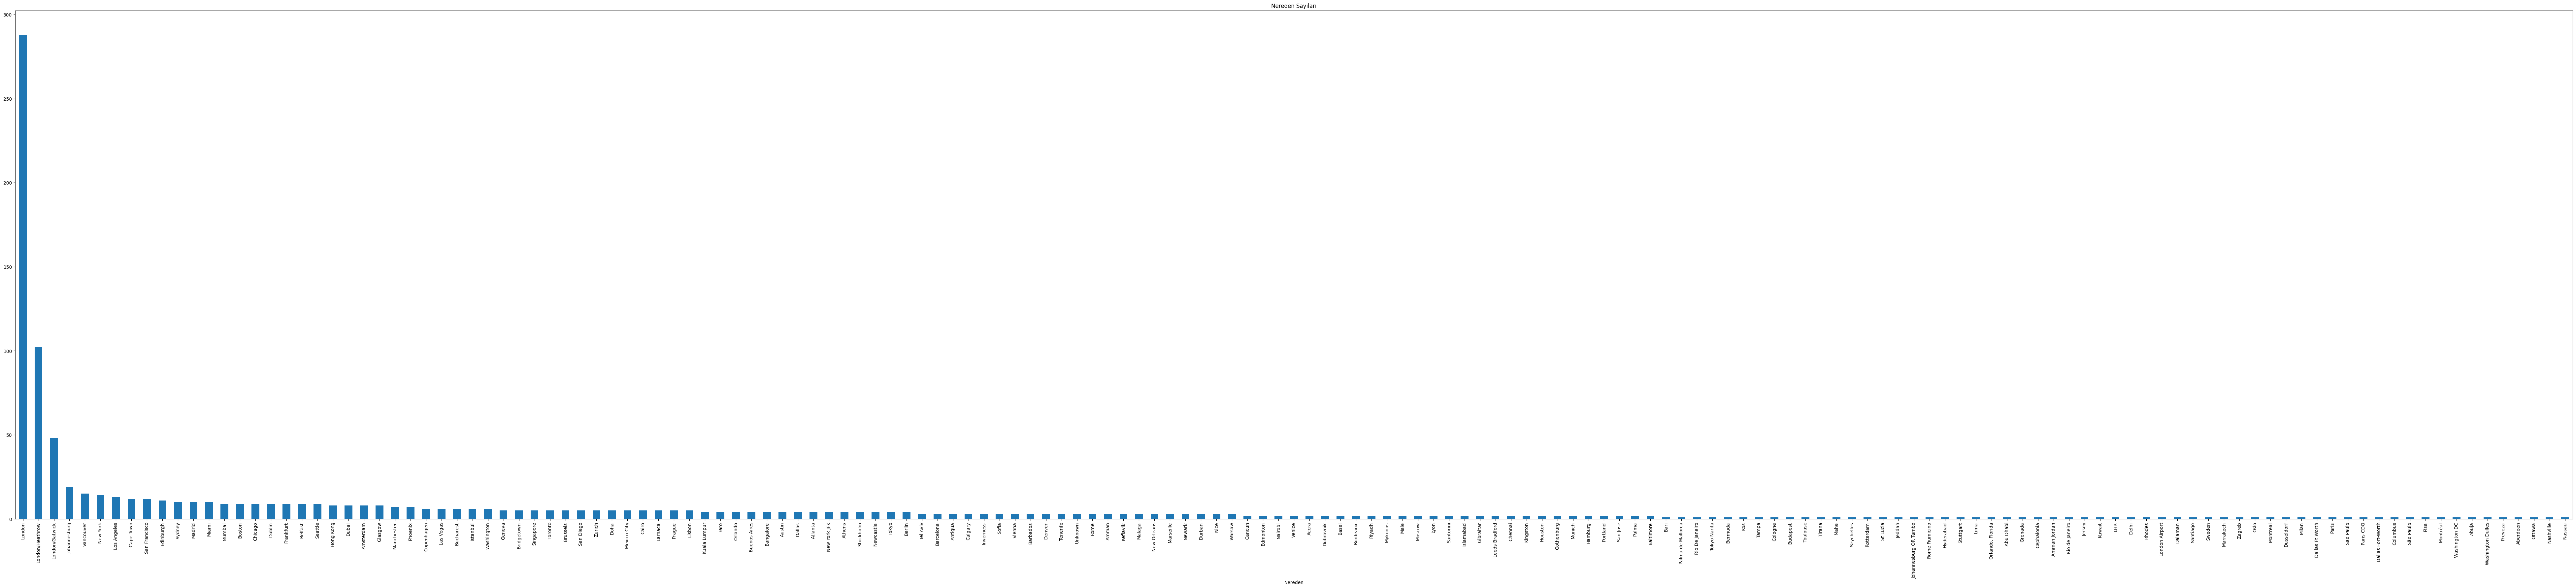

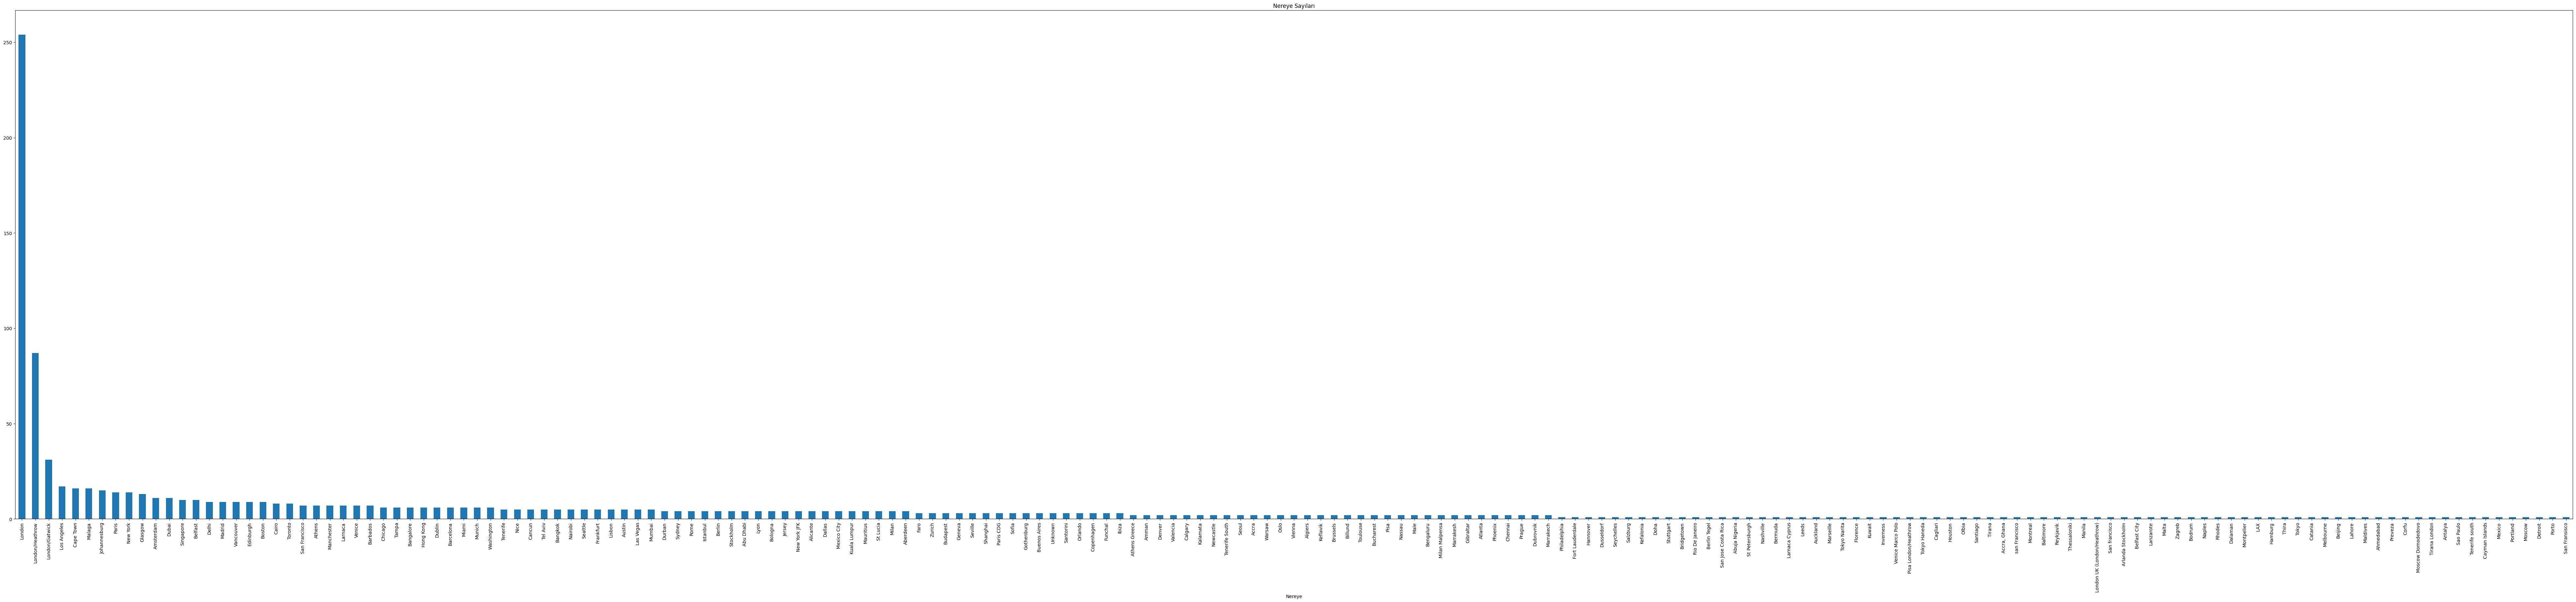

In [37]:
# 'Nereden' sütunu için grafik çizdirme
nereden_counts = df['Nereden'].value_counts()
plt.figure(figsize=(100,20))
nereden_counts.plot(kind='bar')
plt.title('Nereden Sayıları')
plt.show()

# 'Nereye' sütunu için grafik çizdirme
nereye_counts = df['Nereye'].value_counts()
plt.figure(figsize=(100,20))
nereye_counts.plot(kind='bar')
plt.title('Nereye Sayıları')
plt.show()